In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Veri setini yükle
df = pd.read_csv('/kaggle/input/latest-data-science-job-salaries-2024/DataScience_salaries_2025.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,USD,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,USD,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,USD,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,USD,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,USD,100000,US,100,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           93597 non-null  int64 
 1   experience_level    93597 non-null  object
 2   employment_type     93597 non-null  object
 3   job_title           93597 non-null  object
 4   salary              93597 non-null  int64 
 5   salary_currency     93597 non-null  object
 6   salary_in_usd       93597 non-null  int64 
 7   employee_residence  93597 non-null  object
 8   remote_ratio        93597 non-null  int64 
 9   company_location    93597 non-null  object
 10  company_size        93597 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.9+ MB


In [5]:
# EN: Entry-level (1), MI: Mid-level (2), SE: Senior-level (3), EX: Executive-level (4)
df['experience_level_numeric'] = df['experience_level'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

In [6]:
print("\nEksik Veriler:")
print(df[['experience_level_numeric', 'salary_in_usd']].isnull().sum())


Eksik Veriler:
experience_level_numeric    0
salary_in_usd               0
dtype: int64


In [7]:
df = df.dropna(subset=['experience_level_numeric', 'salary_in_usd'])

In [8]:
# Bağımsız ve bağımlı değişkenler
X = df[['experience_level_numeric']].values
y = df['salary_in_usd'].values

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Polinom regresyon modeli (degree=2)
polyreg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polyreg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [11]:
# Tahminler
y_pred = polyreg.predict(X_test)

In [12]:
# Model değerlendirme
print("\nModel Performansı:")
print("R² Skoru:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Model Performansı:
R² Skoru: 0.10524222200141453
Mean Squared Error: 4812004544.884668


In [13]:
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = polyreg.predict(X_fit)

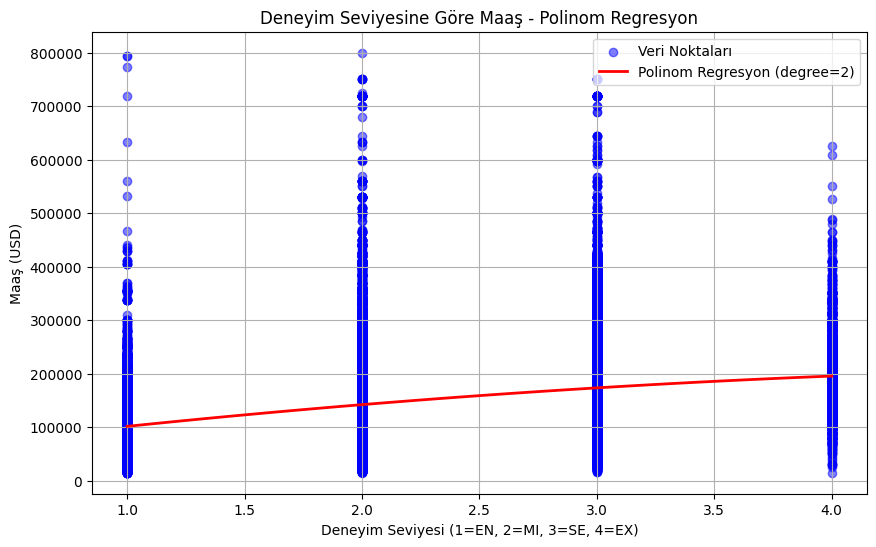

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Veri Noktaları')
plt.plot(X_fit, y_fit, color='red', linewidth=2, label='Polinom Regresyon (degree=2)')
plt.xlabel('Deneyim Seviyesi (1=EN, 2=MI, 3=SE, 4=EX)')
plt.ylabel('Maaş (USD)')
plt.title('Deneyim Seviyesine Göre Maaş - Polinom Regresyon')
plt.legend()
plt.grid(True)
plt.show()

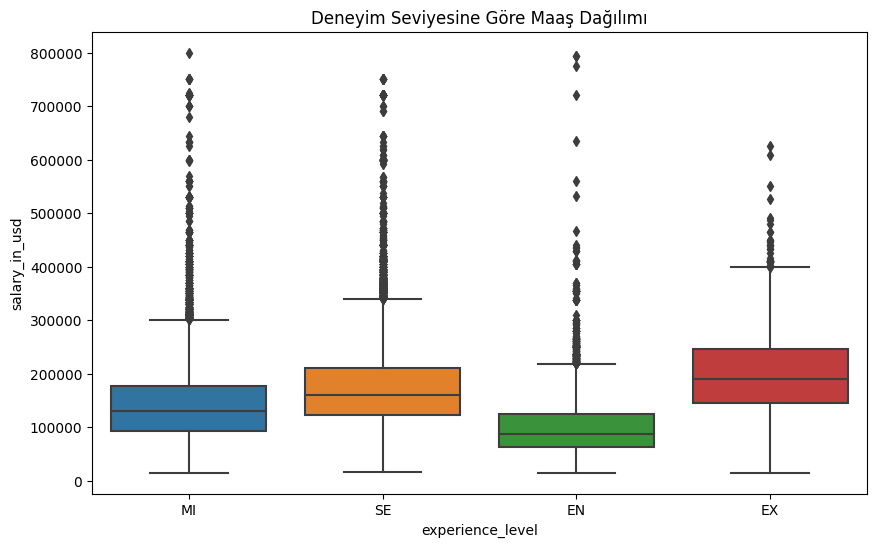

In [15]:
# Aykırı değerleri kontrol etmek için boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Deneyim Seviyesine Göre Maaş Dağılımı')
plt.show()

# Polynomial Regression on Data Science Salaries (2024)

This notebook applies **polynomial regression** to predict data science salaries using the [Latest Data Science Job Salaries 2024](https://www.kaggle.com/datasets/saurabhbadole/latest-data-science-job-salaries-2024) dataset. We model the non-linear relationship between `experience_level` and `salary_in_usd`.

## Objectives
- Explore the dataset structure and features.
- Preprocess data by encoding categorical variables and handling missing values.
- Train a polynomial regression model to predict salaries.
- Evaluate the model using R² score and Mean Squared Error (MSE).
- Visualize the results to interpret the model's fit.

## 1. Importing Libraries
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns